In [10]:
# Step 0: Install scikit-learn if not already installed
try:
    import sklearn
except ModuleNotFoundError:
    import os
    os.system('pip install scikit-learn')
    import sklearn
    import joblib

# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import joblib

# Load the scaler, PCA, logistic regression model, and label encoders from disk
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
log_reg = joblib.load('log_reg.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the test dataset  # Replace with your CSV file path
test_data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Test_data.csv")

# Preprocess the test data
# Drop non-numeric columns except 'class' if it exists
test_data_numeric = test_data.drop(columns=['protocol_type', 'service', 'flag'], errors='ignore')

# Encode categorical columns and handle unseen labels
for column in ['protocol_type', 'service', 'flag']:
    le = label_encoders[column]
    test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    if '<unknown>' not in le.classes_:
        le.classes_ = np.append(le.classes_, '<unknown>')
    test_data[column] = le.transform(test_data[column])

# Combine numeric and encoded categorical columns
test_data_preprocessed = pd.concat([test_data_numeric, test_data[['protocol_type', 'service', 'flag']]], axis=1)

# Standardize the test data
scaled_test_data = scaler.transform(test_data_preprocessed)

# Apply PCA to the test data
principal_components_test = pca.transform(scaled_test_data)

# Predict classes for the test data
test_predictions = log_reg.predict(principal_components_test)

# Add the predictions to the original test data
test_data['Predicted_Class'] = test_predictions
test_data['Anomaly'] = test_data['Predicted_Class'].apply(lambda x: 'Anomaly' if x == 1 else 'Normal')

# Print out the first few rows to see the results
print(test_data.head())

# Save the test data with predictions to a new CSV file
test_output_file_path = 'path_to_save_test_data_results.csv'  # Replace with your desired output path
test_data.to_csv(test_output_file_path, index=False)

color_mapping = {'normal': 'blue', 'anomaly': 'yellow'}
colors = test_data['anomaly'].map(color_mapping)


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       46     1          0          0     0   
1         0              1       46     1          0          0     0   
2         2              1       19     9      12983          0     0   
3         0              0       13     9         20          0     0   
4         1              1       57     2          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2       

KeyError: 'anomaly'

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       46     1          0          0     0   
1         0              1       46     1          0          0     0   
2         2              1       19     9      12983          0     0   
3         0              0       13     9         20          0     0   
4         1              1       57     2          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2       

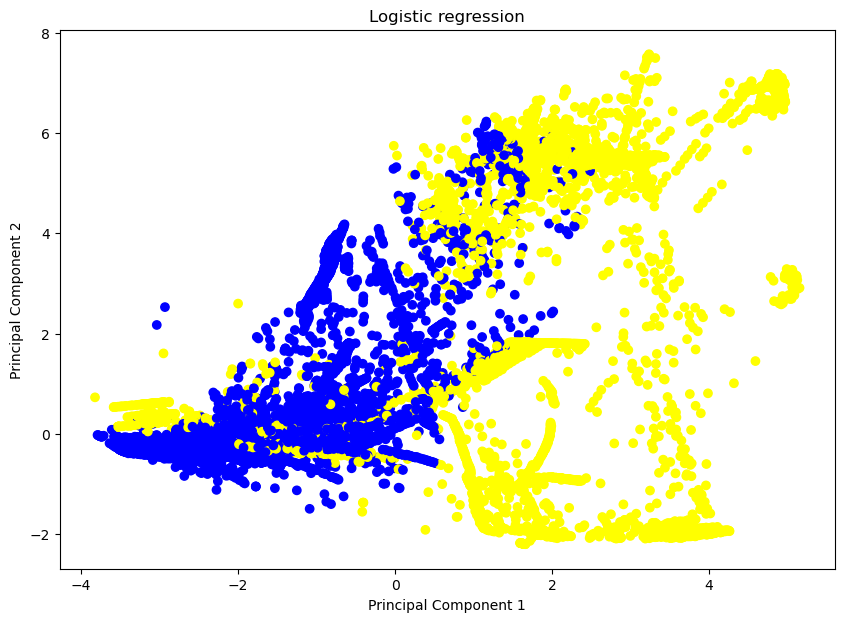

In [14]:
# Step 0: Install scikit-learn if not already installed
try:
    import sklearn
except ModuleNotFoundError:
    import os
    os.system('pip install scikit-learn')
    import sklearn
    import joblib

# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt

# Load the scaler, PCA, logistic regression model, and label encoders from disk
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
log_reg = joblib.load('log_reg.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Load the test dataset  # Replace with your CSV file path
test_data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Test_data.csv")

# Preprocess the test data
# Drop non-numeric columns except 'class' if it exists
test_data_numeric = test_data.drop(columns=['protocol_type', 'service', 'flag'], errors='ignore')

# Encode categorical columns and handle unseen labels
for column in ['protocol_type', 'service', 'flag']:
    le = label_encoders[column]
    test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    if '<unknown>' not in le.classes_:
        le.classes_ = np.append(le.classes_, '<unknown>')
    test_data[column] = le.transform(test_data[column])

# Combine numeric and encoded categorical columns
test_data_preprocessed = pd.concat([test_data_numeric, test_data[['protocol_type', 'service', 'flag']]], axis=1)

# Standardize the test data
scaled_test_data = scaler.transform(test_data_preprocessed)

# Apply PCA to the test data
principal_components_test = pca.transform(scaled_test_data)

# Predict classes for the test data
test_predictions = log_reg.predict(principal_components_test)

# Add the predictions to the original test data
test_data['Predicted_Class'] = test_predictions
test_data['Anomaly'] = test_data['Predicted_Class'].apply(lambda x: 'Anomaly' if x == 1 else 'Normal')

# Print out the first few rows to see the results
print(test_data.head())

# Save the test data with predictions to a new CSV file
test_output_file_path = r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\test_data_results.csv"  # Replace with your desired output path
test_data.to_csv(test_output_file_path, index=False)

# Plot the results
color_mapping = {'Normal': 'blue', 'Anomaly': 'yellow'}
colors = test_data['Anomaly'].map(color_mapping)

plt.figure(figsize=(10, 7))
plt.scatter(principal_components_test[:, 0], principal_components_test[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic regression')
plt.show()

